# # Rainfall Weather Forecasting
# Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
# 1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



# Dataset Description:
Number of columns: 23


* Date  - The date of observation
* Location  -The common name of the location of the weather station
* MinTemp  -The minimum temperature in degrees celsius
* MaxTemp -The maximum temperature in degrees celsius
* Rainfall  -The amount of rainfall recorded for the day in mm
* Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine  -The number of hours of bright sunshine in the day.
* WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
* WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am -Direction of the wind at 9am
* WindDir3pm -Direction of the wind at 3pm
* WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am -Humidity (percent) at 9am
* Humidity3pm -Humidity (percent) at 3pm
* Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am - Fraction of sky obscured by cloud at 9am. 
* Cloud3pm -Fraction of sky obscured by cloud 
* Temp9am-Temperature (degrees C) at 9am
* Temp3pm -Temperature (degrees C) at 3pm
* RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


# Importing Libraries 

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import requests
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.inspection import permutation_importance
from tabulate import tabulate
from imblearn.over_sampling import SMOTE
%matplotlib inline
from sklearn.metrics import confusion_matrix

# Importing Dataset

In [4]:
rainfall_data = pd.read_csv('WeatherAUS.csv')

In [5]:
rainfall_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Data Exploration 

In [6]:
rainfall_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
rainfall_data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [8]:
rainfall_data.shape

(8425, 23)

There are 8425 rows/ observations and 23 columns/variables in the dataset.

# Dataset Columns

In [9]:
#outputs the name of all the columns
list(rainfall_data.columns)
     

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [10]:
#numerical columns
print(list(rainfall_data.select_dtypes(include=[np.number]).columns))
print(len(list(rainfall_data.select_dtypes(include=[np.number]).columns)))
     

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
16


In [11]:
print(list(rainfall_data.select_dtypes(exclude=[np.number])))
print(len(list(rainfall_data.select_dtypes(exclude=[np.number]))))

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
7


The dataset has 16 quantitative variables and 7 categorical variables.



In [12]:
#output the dtypes for each column
rainfall_data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Dataset Summary

In [13]:
#prints a concise summary of our dataframe
rainfall_data.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# Null values in dataset

In [14]:
#Shows how many null values are in each column
null_data = rainfall_data.isnull().sum().to_frame(name="# of null values")
null_data['% null'] = (rainfall_data.isnull().sum())/rainfall_data.shape[0]
null_data
     

,# of null values,% null
Date,0,0.000000
Location,0,0.000000
MinTemp,75,0.008902
MaxTemp,60,0.007122
Rainfall,240,0.028487
Evaporation,3512,0.416855
Sunshine,3994,0.474065
WindGustDir,991,0.117626
WindGustSpeed,991,0.117626
WindDir9am,829,0.098398


While most variables have under 10% of their data as null, the following variables have over 25% of their entries as null values:


# Descriptive statistics of dataset

In [18]:
rainfall_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [19]:
rainfall_data.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,8425,8425,7434,7596,8117,8185,8186
unique,3004,12,16,16,16,2,2
top,2011-01-31,Melbourne,N,N,SE,No,No
freq,5,1622,713,906,813,6195,6195


Modes:

* Date - 2013-11-12
* Location - Canberra
* WindGustDir - W
* WindDir9am - N
* WindDir3pm - SE
* RainToday - No
* RainTomorrow - No




* Other observations:





* Date and Location have a large amount of unique values.
* RainToday and RainTomorrow only have two unique values (Yes or No).
* The dataset is imbalanced with 75.83% of RainTommorrow having the value of No.


# Frequency of Rain Tomorrow

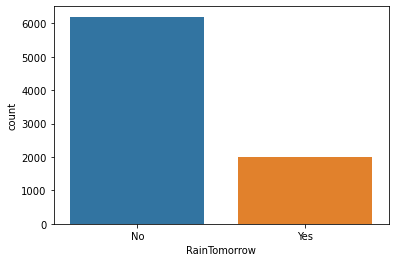

In [21]:
sns.countplot(x="RainTomorrow", data=rainfall_data)
plt.show()

The above bar plot visualizes the imbalance between the number of entries with RainTomorrow as No and the number of entries with RainTomorrow as Yes.



In [22]:
#We can map RainToday and RainTomorrow to binary values
rainfall_data['RainTomorrow']=rainfall_data['RainTomorrow'].map({'Yes':1,'No':0})
rainfall_data['RainToday']=rainfall_data['RainToday'].map({'Yes':1,'No':0})
     

# Rain Tomorrow Frequency Across Locations

<Figure size 1440x720 with 0 Axes>

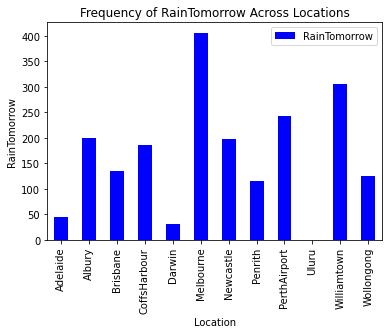

In [23]:
plt.figure(figsize=(20, 10))
groupby_location = rainfall_data.groupby('Location').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')
# groupby_location = rainfall_data.groupby(['Location', 'RainTomorrow']).size().reset_index(name='count')
# pivot_table = groupby_location.pivot(index='Location', columns='RainTomorrow', values='count')
# pivot_table.plot(kind='bar',width=0.9)
plt.title('Frequency of RainTomorrow Across Locations')
plt.xlabel('Location')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()

# Rain Tomorrow Frequency Per year

In [24]:
#convert date to datetime type
rainfall_data['Date']= pd.to_datetime(rainfall_data['Date'])

#create Year and Month columns
rainfall_data['Year'] = rainfall_data['Date'].dt.year
rainfall_data['Month'] = rainfall_data['Date'].dt.month

#drop date
rainfall_data = rainfall_data.drop('Date',axis=1)
     


<Figure size 1440x720 with 0 Axes>

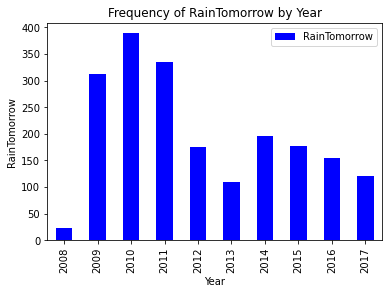

In [25]:
plt.figure(figsize=(20,10)) 
groupby_location = rainfall_data.groupby('Year').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')

plt.title('Frequency of RainTomorrow by Year')
plt.xlabel('Year')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()

2008 has the lowest frequency and 2010 had the highest frequency.

# Rain Tomorrow Frequency per Month

<Figure size 1440x720 with 0 Axes>

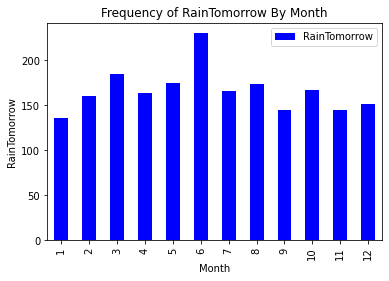

In [26]:
plt.figure(figsize=(20,10)) 
groupby_location = rainfall_data.groupby('Month').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')

plt.title('Frequency of RainTomorrow By Month')
plt.xlabel('Month')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()

# Frequency of RainTomorrow by WindGustDir



<Figure size 1440x720 with 0 Axes>

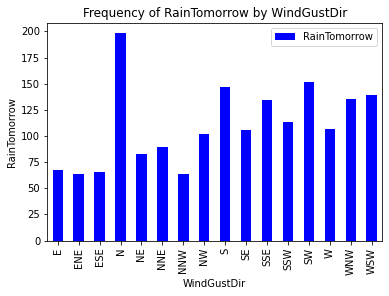

In [27]:
plt.figure(figsize=(20,10)) 
groupby_location = rainfall_data.groupby('WindGustDir').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')

plt.title('Frequency of RainTomorrow by WindGustDir')
plt.xlabel('WindGustDir')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()

# Frequency of RainTomorrow by WindDir9am



<Figure size 1440x720 with 0 Axes>

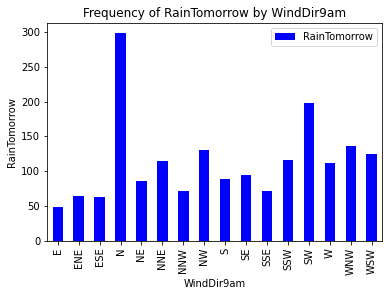

In [28]:
plt.figure(figsize=(20,10)) 
groupby_location = rainfall_data.groupby('WindDir9am').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')

plt.title('Frequency of RainTomorrow by WindDir9am')
plt.xlabel('WindDir9am')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()

# Frequency of RainTomorrow by WindDir3pm


<Figure size 1440x720 with 0 Axes>

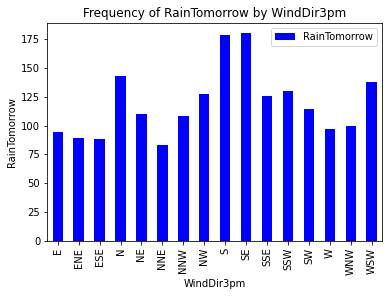

In [29]:

plt.figure(figsize=(20,10)) 
groupby_location = rainfall_data.groupby('WindDir3pm').agg({'RainTomorrow':'sum'})
groupby_location.plot(kind='bar', color = 'blue')

plt.title('Frequency of RainTomorrow by WindDir3pm')
plt.xlabel('WindDir3pm')
plt.ylabel('RainTomorrow')
plt.xticks(rotation=90)
plt.show()
     

# Chi-Squared Tests



In [30]:
contingency_table = pd.crosstab(rainfall_data["RainTomorrow"], rainfall_data["Location"])

display(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("There is a relationship between RainTomorrow and Location.")
else:
    print("There is no relationship between RainTomorrow and Location.")


Location,Adelaide,Albury,Brisbane,CoffsHarbour,Darwin,Melbourne,Newcastle,Penrith,PerthAirport,Uluru,Williamtown,Wollongong
RainTomorrow,,,,,,,,,,,,
0.0,156,699,439,424,218,1096,610,363,962,38,848,342
1.0,45,199,135,186,32,406,198,116,242,0,306,126


There is a relationship between RainTomorrow and Location.


In [31]:
contingency_table = pd.crosstab(rainfall_data["RainTomorrow"], rainfall_data["Year"])

display(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("There is a relationship between RainTomorrow and Year.")
else:
    print("There is no relationship between RainTomorrow and Year.")

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
RainTomorrow,,,,,,,,,,
0.0,65,921,1047,1022,716,434,750,454,516,270
1.0,23,313,389,334,176,109,195,178,154,120


There is a relationship between RainTomorrow and Year.


In [32]:
contingency_table = pd.crosstab(rainfall_data["RainTomorrow"], rainfall_data["Month"])

display(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("There is a relationship between RainTomorrow and Month.")
else:
    print("There is no relationship between RainTomorrow and Month.")

Month,1,2,3,4,5,6,7,8,9,10,11,12
RainTomorrow,,,,,,,,,,,,
0.0,604,440,560,426,625,570,554,496,461,464,472,523
1.0,136,160,184,163,174,230,165,173,144,167,144,151


There is a relationship between RainTomorrow and Month.


In [34]:
contingency_table = pd.crosstab(rainfall_data["RainTomorrow"], rainfall_data["WindDir9am"])

display(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("There is a relationship between RainTomorrow and WindGustDir9am.")
else:
    print("There is no  relationship between RainTomorrow and WindGustDir9am.")
     


WindDir9am,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
0.0,323,364,186,571,316,305,192,473,302,403,287,337,491,292,330,391
1.0,48,64,62,298,85,115,72,131,88,94,71,116,198,112,136,124


There is a relationship between RainTomorrow and WindGustDir9am.


In [35]:
contingency_table = pd.crosstab(rainfall_data["RainTomorrow"], rainfall_data["WindDir3pm"])

display(contingency_table)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("There is a relationship between RainTomorrow and WindDir3pm.")
else:
    print("There is no relationship between RainTomorrow and WindDir3pm.")

WindDir3pm,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
RainTomorrow,,,,,,,,,,,,,,,,
0.0,355,309,365,366,429,276,191,334,524,617,478,229,368,355,373,425
1.0,94,89,88,143,110,83,108,127,179,180,126,130,114,97,100,138


There is a relationship between RainTomorrow and WindDir3pm.


# Histograms of numerical variables




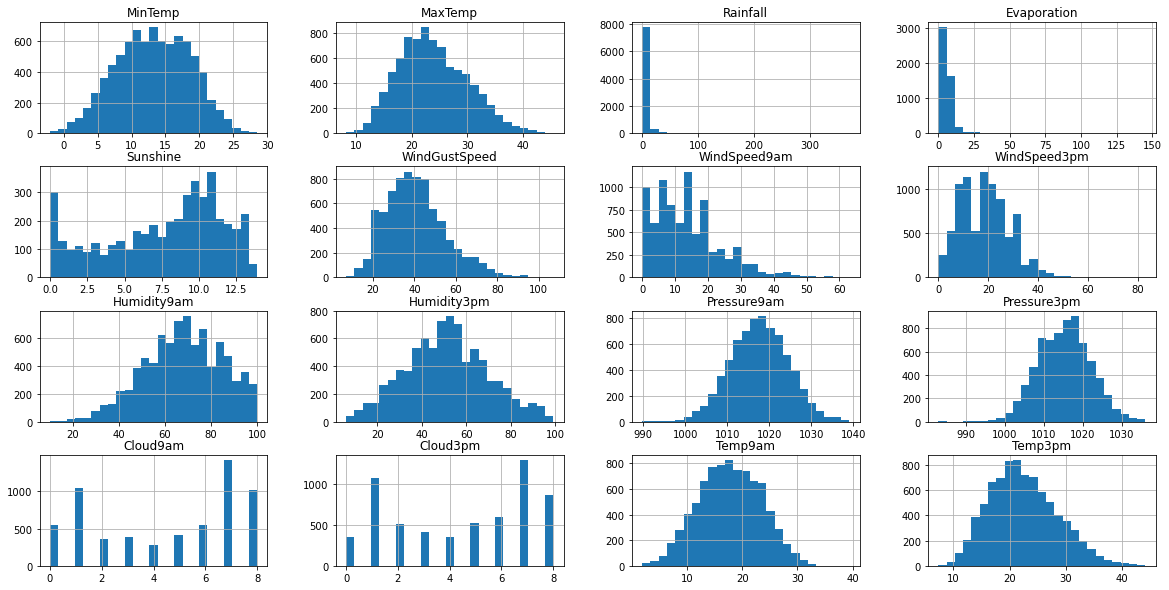

In [36]:
column_names = list(rainfall_data.select_dtypes(include=[np.number]).drop(['Year', 'Month', 'RainToday','RainTomorrow'],axis=1).columns)
ax_count = 0
rainfall_data.hist(column = column_names, figsize=(20, 10), bins=25)  
plt.show() 
     

Using histograms, we can better visualize the distribution of our variables.

MinTemp, MaxTemp, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, and Temp3pm have approximately normal distributions.

However, some variables have skewed distribution.

WindGustSpeed, WindSpeed9am, and Windspeed3pm are all skewed to the right. Rainfall and Evaporation are heavily skewed right.

Sunshine and Humidity are both skewed to the left.

Cloud9am and Cloud3pm appear to have a bimodal distribution.

# Boxplots of numerical variables



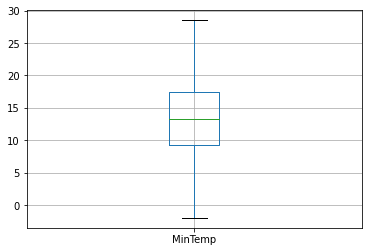

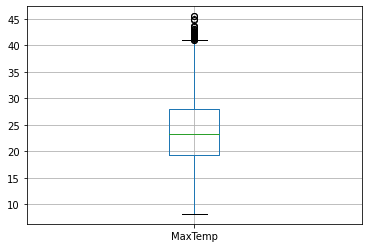

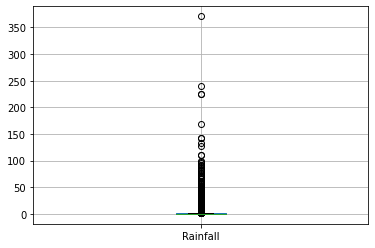

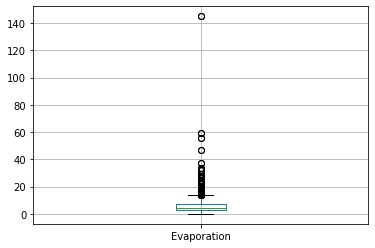

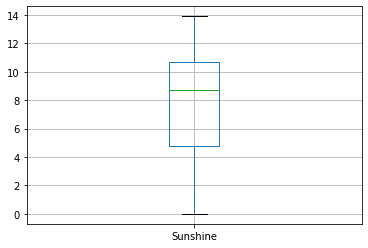

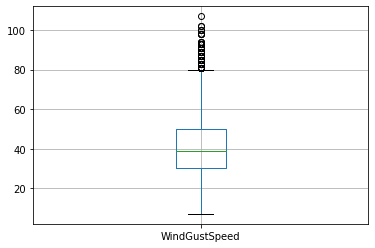

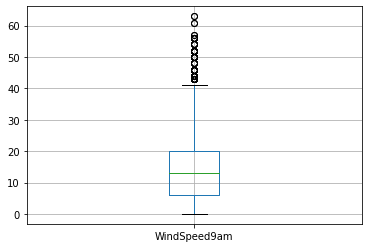

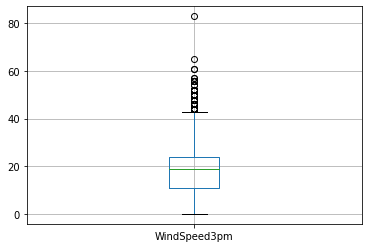

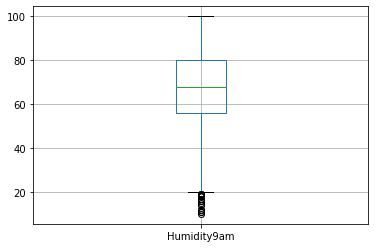

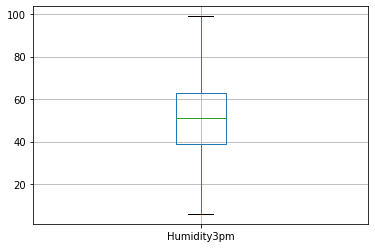

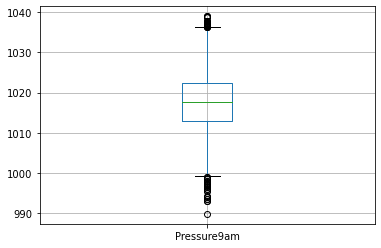

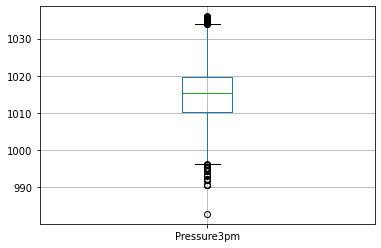

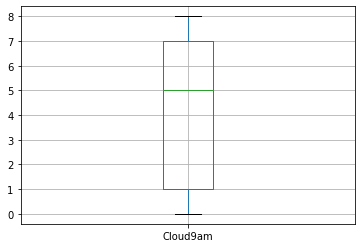

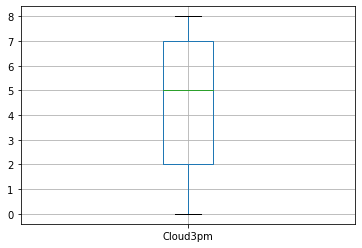

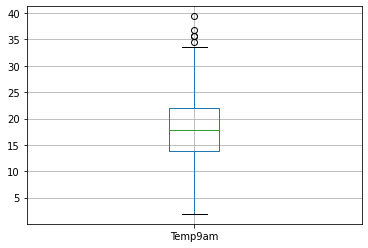

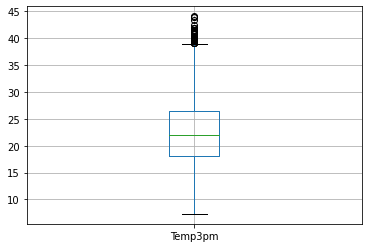

In [37]:
for name in column_names:
  plt.figure()
  rainfall_data.boxplot(column=name,figsize=(5,5))


The boxplots show that several variables are heavily influenced by outliers.

# Correlation between numerical variables



In [38]:
rainfall_data.select_dtypes(include=[np.number]).drop(['Year', 'Month'],axis=1).corr()
     


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652,0.069946,0.099464
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665,-0.229293,-0.154657
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263,0.463211,0.225180
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156,-0.121856,-0.081179
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057,-0.338018,-0.471405
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872,0.089015,0.211384
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619,0.039941,0.073335
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201,0.022351,0.058073
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788,0.382923,0.279701
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634,0.367895,0.457160


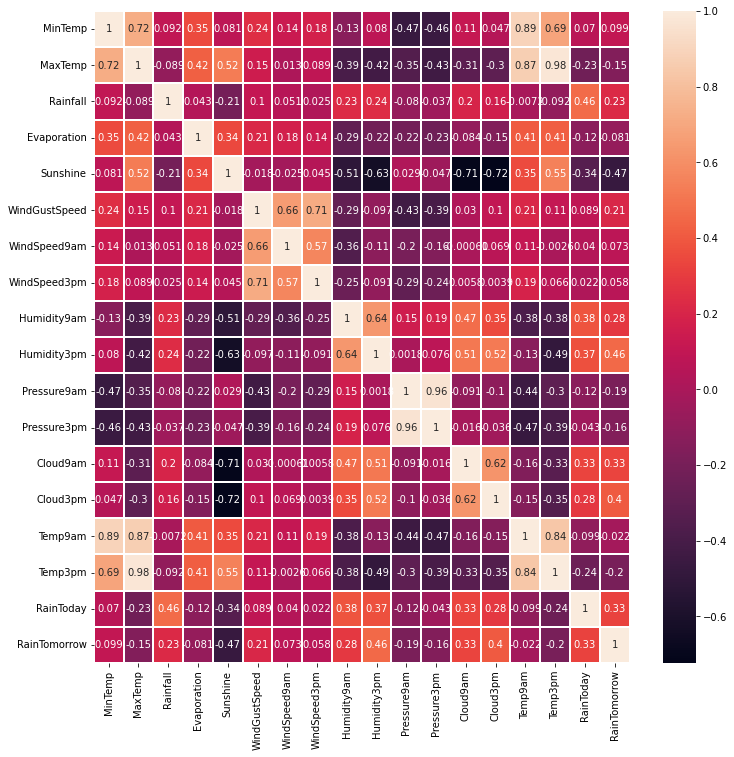

In [39]:
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(rainfall_data.select_dtypes(include=[np.number]).drop(['Year', 'Month'],axis=1).corr(),annot=True,linewidths=0.2,ax=ax);
     


In [40]:
#print out correlation coefficients 
corr_matrix = rainfall_data.select_dtypes(include=[np.number]).drop(['Year', 'Month'],axis=1).corr()
corr_series = corr_matrix.unstack()

print("Strong Positive Correlation")
strong_positive_pairs = corr_series[(corr_series >= 0.70) & (corr_series != 1)]
print(strong_positive_pairs)

print("Strong Negative Correlation")
strong_negative_pairs = corr_series[(corr_series <= -0.70)]
print(strong_negative_pairs)


Strong Positive Correlation
MinTemp        MaxTemp          0.720955
               Temp9am          0.888342
MaxTemp        MinTemp          0.720955
               Temp9am          0.869503
               Temp3pm          0.978665
WindGustSpeed  WindSpeed3pm     0.711403
WindSpeed3pm   WindGustSpeed    0.711403
Pressure9am    Pressure3pm      0.961922
Pressure3pm    Pressure9am      0.961922
Temp9am        MinTemp          0.888342
               MaxTemp          0.869503
               Temp3pm          0.837552
Temp3pm        MaxTemp          0.978665
               Temp9am          0.837552
dtype: float64
Strong Negative Correlation
Sunshine  Cloud9am   -0.705577
          Cloud3pm   -0.723957
Cloud9am  Sunshine   -0.705577
Cloud3pm  Sunshine   -0.723957
dtype: float64


# Pair plot of strongly correlated variables



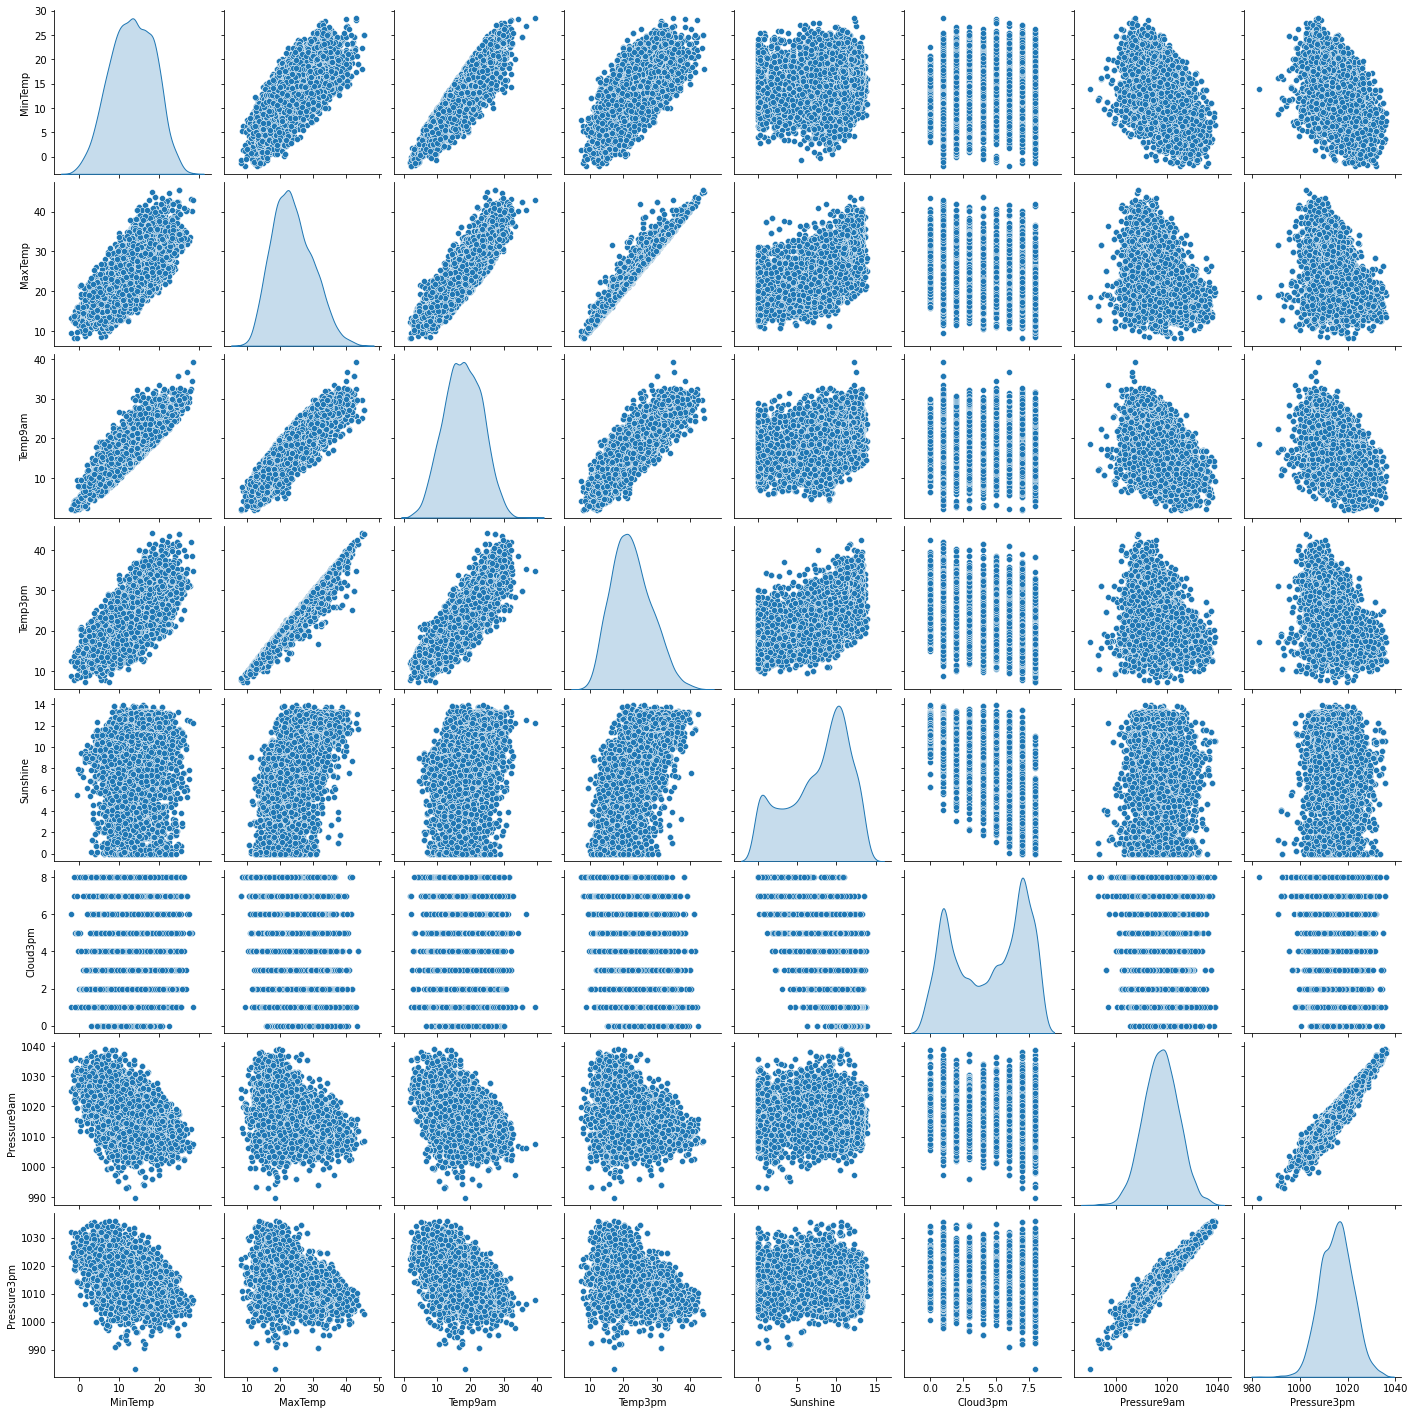

In [41]:
strongly_corr_vars = ['MinTemp','MaxTemp','Temp9am','Temp3pm','Sunshine','Cloud3pm','Pressure9am','Pressure3pm']
sns.pairplot(rainfall_data[strongly_corr_vars], kind='scatter', diag_kind='kde', palette='Rainbow')
plt.show()

# Data Cleaning
Using the observations made during data exploration, the Rain in Australia dataset must now be cleaned so it can be used for training.

# Handling missing data
Only a small percentage of the entries for RainTommorrow are null, so all the missing values for RainTommorow are simply dropped from the dataset.

In [42]:
rainfall_data = rainfall_data.dropna(subset=['RainTomorrow'])
     

In [43]:
rainfall_data = rainfall_data.dropna(subset=['RainToday'])

In a similar vein, MinTemp, MaxTemp, Rainfall, Temp9am,Temp3pm all have a weak correlation to RainTomorrow as well as a small % of missing values.

In [44]:
rainfall_data = rainfall_data.dropna(subset=['MinTemp'])
rainfall_data = rainfall_data.dropna(subset=['MaxTemp'])
rainfall_data = rainfall_data.dropna(subset=['Rainfall'])
rainfall_data = rainfall_data.dropna(subset=['Temp9am'])
rainfall_data = rainfall_data.dropna(subset=['Temp3pm'])
     

In [45]:
for colname in ['WindGustDir','WindDir9am','WindDir3pm']:
  rainfall_data[colname]=rainfall_data[colname].fillna(rainfall_data[colname].mode()[0])
     

Will we have to use the other two measures of central tendency to handle the missing values in the numerical variables. For the variables with a normal distribution, we can replace the NA values with the mean. For the variables with non-normal distributions, we can use the median instead.

In [46]:
normal_col_names = ['Humidity3pm','Pressure9am','Pressure3pm']
skewed_col_names = ['Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Cloud9am','Cloud3pm']

#replace NA values with mean or median. 
rainfall_data[normal_col_names]=rainfall_data[normal_col_names].fillna(rainfall_data[normal_col_names].mean())
rainfall_data[skewed_col_names]=rainfall_data[skewed_col_names].fillna(rainfall_data[skewed_col_names].median())
     

In [47]:
null_data = rainfall_data.isnull().sum().to_frame(name="# of null values")
null_data['% null'] = (rainfall_data.isnull().sum())/rainfall_data.shape[0]
null_data
     


,# of null values,% null
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0
WindDir3pm,0,0.0


Now, we longer have any null values in our data!

# Converting Categorical Variables to Numerical Variables
The remaining categorical variables will have to be converted to numerical variables so we can feed the data into different machine learning models. Since all of the values for our remaining categorical variables are non-ordinal, we'll use one-hot encoding to create additional features based on the number of unique values in each categorical variable.

In [48]:
#Use one-hot encoding to convert all the categorical variables to numerical data that can be used by all models
rainfall_data=pd.get_dummies(rainfall_data)
     

# Data Normalization
Now that we've converted our entire dataset to numerical features, we're confronted with another problem: the ranges of some of our features vary greatly from the ranges of other features. This attribute can be especially problematic for some machine learning models such as kNN, since it results in some features being given much greater weight than other regardless how important they actually are. We can handle this issue in our dataset by using Min-Max Normalization to make sure all the values in our dataset lie between 0 and 1.

In [49]:
for colname in list(rainfall_data.columns):
  rainfall_data[colname] = (rainfall_data[colname] - rainfall_data[colname].min())/(rainfall_data[colname].max() - rainfall_data[colname].min())
     

# Removing Highly Correlated Variables
The variables with a strong relationship with training features are dropped to help prevent overfitting and data redundancy.

In [50]:
rainfall_data = rainfall_data.drop(['MinTemp','MaxTemp','Temp9am','Pressure9am','Cloud3pm'], axis=1)
  

# Splitting data into Training and Test


In [51]:

#Split data into training and test 
train,test = train_test_split(rainfall_data,random_state= 1, test_size=0.3, shuffle=True)
     

# Applying SMOTE to the training set

In [64]:
def smote_oversample(df, target_col):
   X = df.drop(columns=[target_col]).values
   y = df[target_col].values

   smote = SMOTE()
   X_resampled, y_resampled = smote.fit_resample(X, y)

   df_resampled = pd.DataFrame(X_resampled, columns=df.drop(columns=[target_col]).columns)
   df_resampled[target_col] = y_resampled
   
   return df_resampled

In [66]:
#For encoding the features
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
